In [102]:
import random
import numpy as np
from numpy import asarray
from numpy import arange
from numpy import meshgrid

from math import sqrt

import scipy.optimize as opt
import matplotlib.pylab as plt
from matplotlib import cm

from matplotlib.ticker import LinearLocator, FormatStrFormatter

### Set and analyze the function 

In [4]:
# Set an objective function
def f(x,y):
    return x**2 + y**2 + 1

In [5]:
# Data for function
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

In [43]:
# Size of X set
len(X)

40

#### Plot the function

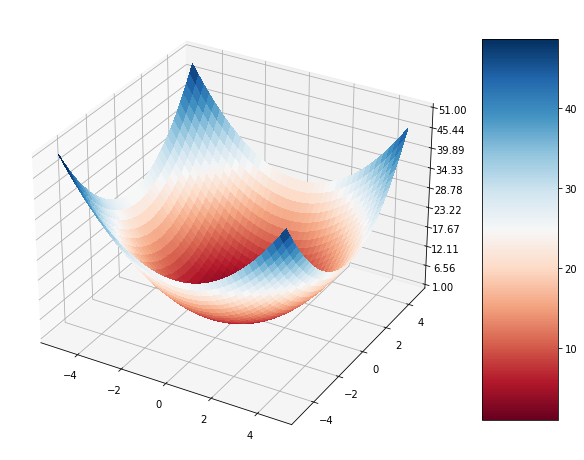

In [103]:
fig = plt.figure(1, figsize = (10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

#### Stochastic Gradient Descent for a function of two variables (x and y)

In [8]:
# Partial derivative for x
def dfdx(x,y):
    return 2*x

# Partial derivative for y
def dfdy(x,y):
    return 2*y

# Gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

In [157]:
# SGD implementation
def stochastic_grad_descent_mult(df, x_prev, learn_rate):
    
    epsilon = 0.0001
    grad_iter = 1
    
    seq_x = []
    seq_y = []

    x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        
        if random.choice([True, False]):
            x_next = x_prev - learn_rate*grad_vector(x_prev[0], 0)
        else:
            x_next = x_prev - learn_rate*grad_vector(0, x_prev[1])
        grad_iter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_iter, seq_x, seq_y)

(array([0.00013162, 0.00156728]), 34, array([3.60000000e+00, 2.16000000e+00, 1.29600000e+00, 1.29600000e+00,
       1.29600000e+00, 7.77600000e-01, 4.66560000e-01, 2.79936000e-01,
       1.67961600e-01, 1.67961600e-01, 1.67961600e-01, 1.00776960e-01,
       1.00776960e-01, 6.04661760e-02, 3.62797056e-02, 3.62797056e-02,
       2.17678234e-02, 2.17678234e-02, 1.30606940e-02, 1.30606940e-02,
       7.83641641e-03, 7.83641641e-03, 4.70184985e-03, 4.70184985e-03,
       2.82110991e-03, 1.69266594e-03, 1.01559957e-03, 1.01559957e-03,
       6.09359740e-04, 3.65615844e-04, 3.65615844e-04, 3.65615844e-04,
       2.19369506e-04, 1.31621704e-04]), array([1.2       , 1.2       , 1.2       , 0.72      , 0.432     ,
       0.432     , 0.432     , 0.432     , 0.432     , 0.2592    ,
       0.15552   , 0.15552   , 0.093312  , 0.093312  , 0.093312  ,
       0.0559872 , 0.0559872 , 0.03359232, 0.03359232, 0.02015539,
       0.02015539, 0.01209324, 0.01209324, 0.00725594, 0.00725594,
       0.00725594,

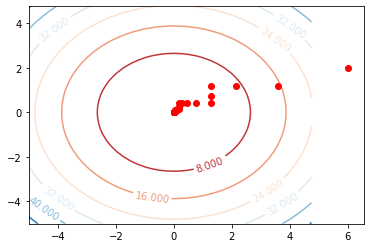

In [158]:
# Results for SGD 
grad_output = stochastic_grad_descent_mult(grad_vector, np.array([6,2]), 0.2)
print(grad_output)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

In [122]:
# Function for the drawing the results
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

In [119]:
# Function for drawing the process of finding an extremum 
def plot_process(iter_num, x_s):
    iters = np.array([i for i in range(iter_num-1)])
    deltas_x = np.array([x_s[i+1] - x_s[i] for i in range(len(x_s)-1)])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(iters, deltas_x, color='tab:blue')
    ax.grid()

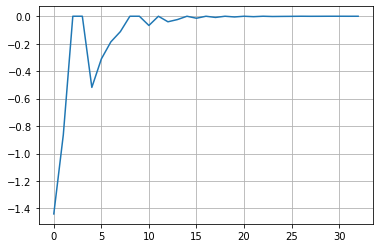

In [159]:
plot_process(grad_output[1], grad_output[2])

In [128]:
# gradient descent algorithm with adam
def adam(bounds, learn_rate, beta1, beta2, eps=1e-8):
    seq_x = []
    seq_y = []
    
    x_prev = -5.0  
    y_prev = -5.0  
    grad_iter = 0
    
    # generate an initial point
    x = random.randrange(-5, 5)
    y = random.randrange(-5, 5)
    score = f(x, y)
    
    # initialize first and second moments for x and y variables
    m_x = 0.0
    m_y = 0.0
    
    v_x = 0.0
    v_y = 0.0
    
    # run the gradient descent updates
    while np.linalg.norm(np.subtract(np.array([x_prev, x]), np.array([y_prev, y]))) > eps:
        
        # calculate gradient vector
        g = grad_vector(x, y)
        grad_iter += 1
        
        # calculate the first moment
        m_x = beta1 * m_x + (1.0 - beta1) * g[0]
        m_y = beta1 * m_y + (1.0 - beta1) * g[1]
        
        # calculate the second moment
        v_x = beta2 * v_x + (1.0 - beta2) * g[0]**2
        v_y = beta2 * v_y + (1.0 - beta2) * g[1]**2
        
        # calculate bias-corrected first and second moments
        mhat_x = m_x / (1.0 - beta1**(grad_iter+1))
        mhat_y = m_y / (1.0 - beta1**(grad_iter+1))

        vhat_x = v_x / (1.0 - beta2**(grad_iter+1))
        vhat_y = v_y / (1.0 - beta2**(grad_iter+1))
        
        # update parameters
        x_prev = x
        x = x - learn_rate * mhat_x / (sqrt(vhat_x) + eps)
        y_prev = y
        y = y - learn_rate * mhat_y / (sqrt(vhat_y) + eps)
        
        seq_x = np.append(seq_x, x.copy())
        seq_y = np.append(seq_y, y.copy())
        
    return ((x, y), grad_iter, seq_x, seq_y)

Calculate and draw the result

Minimum (x,y) from gradient descent: (-8.323664523691885e-09,-2.329550598177803e-09)
Number of gradient descent iterations: 349


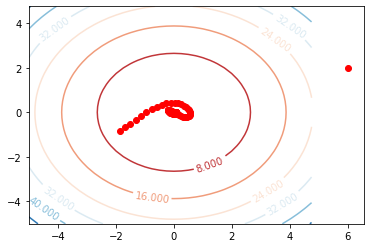

In [140]:
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])

learn_rate = 0.2
beta1 = 0.9
beta2 = 0.999

# perform the gradient descent search with adam
grad_output = adam(bounds, learn_rate, beta1, beta2)

print('Minimum (x,y) from gradient descent: ({},{})'.format(grad_output[0][0], grad_output[0][1]))
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

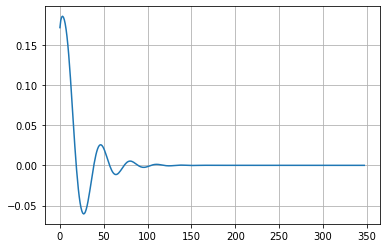

In [141]:
plot_process(grad_output[1], grad_output[2])